In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Solução analítica
def analytical_solution(r):
    return -(R**2 / (4 * mu)) * dp_dz * (1 - (r**2 / R**2))



A velocidade máxima, em r=0 é u(0)=2.0000m/s


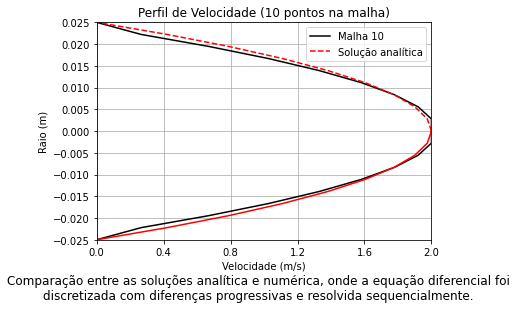

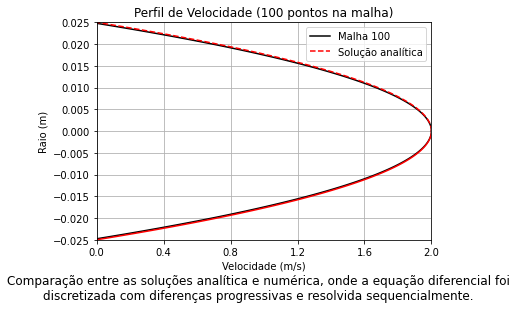

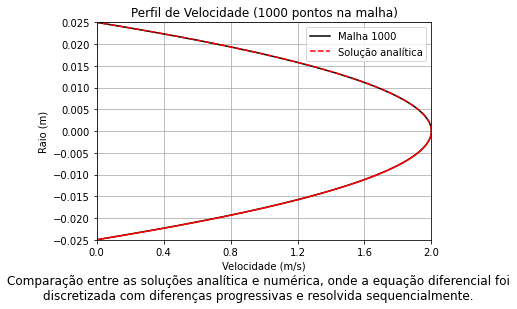

In [5]:
# Parâmetros do problema
R = 0.025 # Raio interno do tubo (em metros)
mu = 1.01e-3 # Viscosidade dinâmica da água (em kg/m/s)
rho = 998 # Massa específica da água (em kg/m³)
dp_dz = -12.928 # Gradiente de pressão (em N/m)
u_max = -R*R*dp_dz/(4*mu)

print("\n")
print(f"A velocidade máxima, em r=0 é u(0)={u_max:.4f}m/s")

# Definição da malha
num_points = [10, 100, 1000] # Número de pontos na malha

# Loop para diferentes malhas
for num in num_points:
    # Discretização da malha
    r = np.linspace(0, R, num)
    
    # Definição dos passos de discretização
    dr = r[1] - r[0]
    a_com = mu/(dr*dr)
    dr2 = dr/2
    
    # Inicialização do vetor de velocidades
    u = np.zeros_like(r)
    
    # Condição de contorno no centro do tubo
    u[0] = u_max
    u[1] = u_max
    
    # Aplicação do método de diferenças finitas (forward difference)
    # Vemos que este método não é tão exato quanto a diagonalização da matriz
    # (código na sequência)
    for i in range(2, num-1):
        a_s = a_com*( r[i] - dr2)/ r[i]
        a_n = a_com*( r[i] + dr2)/ r[i]
        a_p = a_s + a_n
        u[i] =(a_p/a_n)*u[i-1] - (a_s/a_n)*u[i-2] + dp_dz/a_n # Equação das diferenças finitas
    
    # Plot dos resultados numéricos e analíticos
    y_min = -R
    y_max = R
    x_min = 0
    x_max = u_max
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Controle dos ticks do eixo x e y
    x_ticks = np.linspace(x_min, x_max, 6)
    y_ticks = np.linspace(y_min, y_max, 11)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    
    plt.plot(u, r, label='Malha {}'.format(num), color='black')
    plt.plot(u, -r, color='black')
    plt.plot(analytical_solution(r), r, '--', label='Solução analítica',color='red')
    plt.plot(analytical_solution(r), -r,color='red')
    plt.ylabel('Raio (m)')
    plt.xlabel('Velocidade (m/s)')
    plt.legend()
    plt.title('Perfil de Velocidade ({} pontos na malha)'.format(num))
    txt="Comparação entre as soluções analítica e numérica, onde a equação diferencial foi"
    txt2="discretizada com diferenças progressivas e resolvida sequencialmente."
    plt.figtext(0.5, -0.03,txt , ha="center", fontsize=12)
    plt.figtext(0.5, -0.08,txt2 , ha="center", fontsize=12)
    plt.grid(True)
    plt.show()


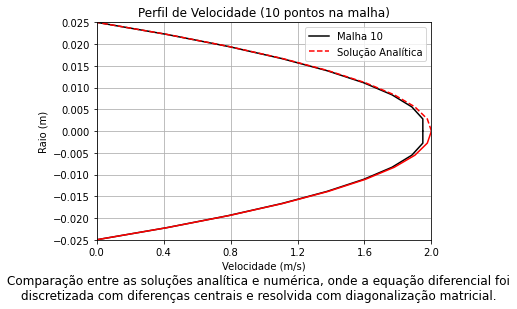

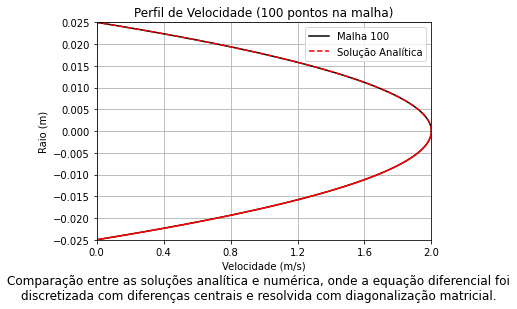

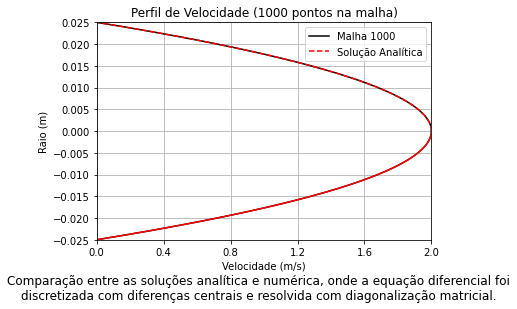

In [11]:
# Loop para diferentes malhas
for num in num_points:
    # Discretização da malha
    r = np.linspace(0, R, num)
    
    # Definição dos passos de discretização
    dr = r[1] - r[0]
    a_com = mu/(dr*dr)
    dr2 = dr/2
    # Inicialização do vetor de velocidades
    u = np.zeros_like(r)
    A = np.zeros((num, num))
    b = np.zeros(num)
    # Condição de contorno no centro do tubo
    u[0] = u_max
    u[1] = u_max
    
    # Aplicação do método de diferenças finitas
    for i in range(1, num-1):
        a_s = a_com*( r[i] - dr2)/ r[i]
        a_n = a_com*( r[i] + dr2)/ r[i]
        a_p = a_s + a_n
        A[i,i] = -a_p
        A[i,i-1] = a_s
        A[i,i+1] = a_n
        b[i] = dp_dz
    
    # Solução do sistema (obtém a solução exata para o sistema matricial)
    A[0, 0] = -1
    A[0, 1] = 1
    A[num-1,num-1] = -1
    b[0] = 0
    b[num-1] = 0
    u = np.linalg.solve(A, b)
    
    # Plot dos resultados numéricos e analíticos
    y_min = -R
    y_max = R
    x_min = 0
    x_max = u_max
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    
    # Controle dos ticks do eixo x e y
    x_ticks = np.linspace(x_min, x_max, 6)
    y_ticks = np.linspace(y_min, y_max, 11)
    plt.xticks(x_ticks)
    plt.yticks(y_ticks)
    plt.plot(u, r, label='Malha {}'.format(num), color='black')
    plt.plot(u, -r, color='black')
    plt.plot(analytical_solution(r), r, '--', label='Solução Analítica',color='red')
    plt.plot(analytical_solution(r), -r,color='red')
    plt.ylabel('Raio (m)')
    plt.xlabel('Velocidade (m/s)')
    plt.legend()
    plt.title('Perfil de Velocidade ({} pontos na malha)'.format(num))
    txt="Comparação entre as soluções analítica e numérica, onde a equação diferencial foi"
    txt2="discretizada com diferenças centrais e resolvida com diagonalização matricial."
    plt.figtext(0.5, -0.03,txt , ha="center", fontsize=12)
    plt.figtext(0.5, -0.08,txt2 , ha="center", fontsize=12)
    plt.grid(True)
    plt.show()

    